<a href="https://colab.research.google.com/github/bibake/ImageDenoising_AutoEncoder/blob/master/ImageDenoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


In [0]:
mnist = keras.datasets.mnist
(x_train, y_), (x_test, _) = mnist.load_data()

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

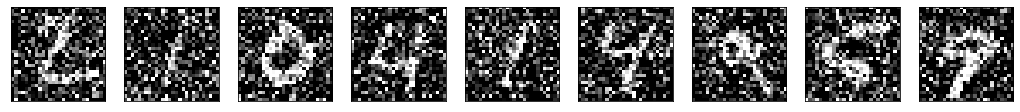

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
img_input = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, 3, activation="relu", padding='same')(img_input)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(32, 3, activation="relu", padding='same')(x)
encoded = layers.MaxPool2D(2)(x)


x = layers.Conv2D(32, 3, activation='relu', padding = 'same')(encoded)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding = 'same')(x)
x = layers.UpSampling2D(2)(x)
decoded = layers.Conv2D(1, 3, activation = 'sigmoid', padding = 'same')(x)

autoencoder = Model(img_input, decoded)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 14, 14, 32)        0   

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 10, restore_best_weights=True)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=500, batch_size=16, validation_data=(x_test_noisy, x_test), callbacks=[es])

Epoch 1/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.1156 - val_loss: 0.1015
Epoch 2/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0995 - val_loss: 0.0973
Epoch 3/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0975 - val_loss: 0.0963
Epoch 4/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0966 - val_loss: 0.0954
Epoch 5/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0960 - val_loss: 0.0952
Epoch 6/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0957 - val_loss: 0.0952
Epoch 7/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0954 - val_loss: 0.0947
Epoch 8/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0952 - val_loss: 0.0947
Epoch 9/500
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0951 - val_loss: 0.0944
Epoch 10/500
3750/3750 [==============================] - 10s 3m

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

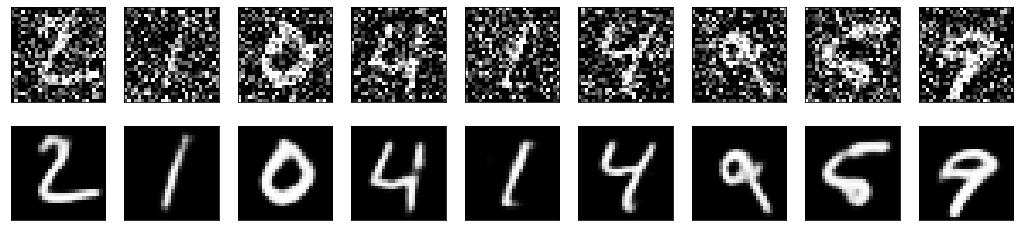

In [0]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()